In [46]:
import os
import papermill as pm
import pandas as pd
import numpy as np

import getpass
username = getpass.getuser()

In [47]:
root = f'/Users/{username}/Dropbox (HMS)/2ABT_Celia/2abt_behavior-main_1'

In [48]:
# Define datapath input and stats file output names

data_path =  f'/Users/{username}/Dropbox (HMS)/2ABT_Celia/jax_ff_ko/lynne_no_thresh_full_1_jax_ff_ko.csv'

stats_file = f'/Users/{username}/Dropbox (HMS)/2ABT_Celia/jax_ff_ko/jax_ff_ko.csv'
# stats_file = '/Users/lynnechantranupong/Desktop/tester9.csv'

assert(not os.path.isfile(stats_file))    

# data_path =  f'/Users/{username}/Dropbox (HMS)/2ABT_Celia/Widespread injections post surgery/lynne_no_thresh_full_1back_widespread_post_all.csv'
# data_path =  f'/Users/{username}/Dropbox (HMS)/2ABT_Celia/Josh data/lynne_no_thresh_full_1back_Josh_mice_all.csv'

data=pd.read_csv(data_path, index_col=0)
mice = data['Mouse ID'].unique()


In [49]:
data

,Trial,Block Trial,0_ITI,0_trialDuration,Decision,1_Port,1_Reward,1_ITI,1_trialDuration,Switch,...,Reward,Mouse ID,Session ID,Condition,laser_stim,Target,Block ID,Current Block Length,session_pos,treatment
0,2,2,6.707,1.024,1,1,0,2.562,1.445,0,...,0,S1355,S1355_03172022,95-05,0,0,1.0,46,0.009852,jax
1,3,3,1.646,2.080,1,1,0,6.707,1.024,0,...,0,S1355,S1355_03172022,95-05,0,0,1.0,46,0.014778,jax
2,4,4,1.672,1.270,0,1,0,1.646,2.080,1,...,1,S1355,S1355_03172022,95-05,0,0,1.0,46,0.019704,jax
3,5,5,6.881,1.256,1,0,1,1.672,1.270,1,...,0,S1355,S1355_03172022,95-05,0,0,1.0,46,0.024631,jax
4,6,6,2.106,1.445,0,1,0,6.881,1.256,1,...,1,S1355,S1355_03172022,95-05,0,0,1.0,46,0.029557,jax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22234,226,36,15.354,1.263,0,0,1,17.039,1.385,0,...,1,S1473,S1473_07132022,95-05,0,0,6.0,40,0.982609,ff
22235,227,37,7.926,1.461,0,0,1,15.354,1.263,0,...,1,S1473,S1473_07132022,95-05,0,0,6.0,40,0.986957,ff
22236,228,38,4.943,1.198,1,0,1,7.926,1.461,1,...,0,S1473,S1473_07132022,95-05,0,0,6.0,40,0.991304,ff
22237,229,39,2.717,1.245,0,1,0,4.943,1.198,1,...,1,S1473,S1473_07132022,95-05,0,0,6.0,40,0.995652,ff


In [50]:
sessions = data['Session ID'].unique()

In [51]:
sessions

array(['S1355_03172022', 'S1355_03212022', 'S1355_03252022',
       'S1355_03312022', 'S1356_03172022', 'S1356_03212022',
       'S1356_03252022', 'S1356_03312022', 'S1357_03172022',
       'S1357_03212022', 'S1357_03232022', 'S1357_03252022',
       'S1357_03292022', 'S1357_03312022', 'S1358_03172022',
       'S1358_03212022', 'S1358_03232022', 'S1358_03252022',
       'S1358_03292022', 'S1399_05102022', 'S1399_05122022',
       'S1399_05162022', 'S1400_05102022', 'S1400_05122022',
       'S1400_05162022', 'S1401_05102022', 'S1401_05122022',
       'S1401_05162022', 'S1374_04112022', 'S1374_04132022',
       'S1374_04152022', 'S1376_03282022', 'S1376_03302022',
       'S1376_04012022', 'S1376_04032022', 'S1376_04052022',
       'S1376_04072022', 'S1416_05232022', 'S1416_05252022',
       'S1416_05272022', 'S1416_05302022', 'S1417_05232022',
       'S1417_05252022', 'S1417_05272022', 'S1417_05302022',
       'S1418_05232022', 'S1418_05252022', 'S1418_05272022',
       'S1419_05232022',

In [52]:
mice

array(['S1355', 'S1356', 'S1357', 'S1358', 'S1399', 'S1400', 'S1401',
       'S1374', 'S1376', 'S1416', 'S1417', 'S1418', 'S1419', 'S1420',
       'S1421', 'S1422', 'S1459', 'S1460', 'S1461', 'S1462', 'S1471',
       'S1472', 'S1473'], dtype=object)

In [53]:
data.columns

Index(['Trial', 'Block Trial', '0_ITI', '0_trialDuration', 'Decision',
       '1_Port', '1_Reward', '1_ITI', '1_trialDuration', 'Switch',
       'Higher p port', 'Reward', 'Mouse ID', 'Session ID', 'Condition',
       'laser_stim', 'Target', 'Block ID', 'Current Block Length',
       'session_pos', 'treatment'],
      dtype='object')

# Iterate across each mouse, combining sessions for each mouse.

In [54]:
overwrite = True

for i,mouse_id in enumerate(mice):
    p = dict(
    condition_column = 'Mouse ID', 
    condition=[mouse_id],
    stats_file = stats_file,
    data_path = data_path,
    )   

    # check that not adding a duplicate column
    try:
        full_stats = pd.read_csv(p['stats_file'])
        if np.any(full_stats[p['condition_column']].isin(p['condition'])) & (not overwrite):
            print(f'skipped {mouse_id}')
            continue
    except FileNotFoundError:
        pass
    
    print(f'{i}/{len(mice)}')
    
    # run different notebook with injected parameters
    output_nb = os.path.join(root,'pm-out.ipynb')
    nb = os.path.join(root,'CB_summary-stats_high_throughput.ipynb')
    pm.execute_notebook(
                nb,
                output_nb,
                parameters=p)
    
os.system('say "script done"')

0/23


Executing: 100%|██████████| 22/22 [00:27<00:00,  1.24s/cell]


1/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  5.73cell/s]


2/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  6.16cell/s]


3/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  6.06cell/s]


4/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  5.81cell/s]


5/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  6.27cell/s]


6/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  6.48cell/s]


7/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  5.95cell/s]


8/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  5.77cell/s]


9/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  5.56cell/s]


10/23


Executing: 100%|██████████| 22/22 [00:04<00:00,  4.66cell/s]


11/23


Executing: 100%|██████████| 22/22 [00:04<00:00,  5.43cell/s]


12/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  5.59cell/s]


13/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  5.63cell/s]


14/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  5.73cell/s]


15/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  6.09cell/s]


16/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  6.14cell/s]


17/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  5.82cell/s]


18/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  6.14cell/s]


19/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  6.55cell/s]


20/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  6.94cell/s]


21/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  6.96cell/s]


22/23


Executing: 100%|██████████| 22/22 [00:03<00:00,  6.13cell/s]


0

# Iterate across each individual session of the mice

In [ ]:
# overwrite = True

# for i,session_id in enumerate(sessions):
#     p = dict(
#     condition_column = 'Session ID', 
#     condition=[session_id],
#     stats_file = stats_file,
#     data_path = data_path,
#     )   

#     # check that not adding a duplicate column
#     try:
#         full_stats = pd.read_csv(p['stats_file'])
#         if np.any(full_stats[p['condition_column']].isin(p['condition'])) & (not overwrite):
#             print(f'skipped {mouse_id}')
#             continue
#     except FileNotFoundError:
#         pass
    
#     print(f'{i}/{len(sessions)}')
    
#     # run different notebook with injected parameters
#     output_nb = os.path.join(root,'pm-out.ipynb')
#     nb = os.path.join(root,'CB_summary-stats_high_throughput.ipynb')
#     pm.execute_notebook(
#                 nb,
#                 output_nb,
#                 parameters=p)
    
# os.system('say "script done"')

# Plotting

In [55]:
full_stats = pd.read_csv(p['stats_file'])

In [56]:
full_stats

,Mouse ID,Mouse,nSessions,meanITI,stdITI,medITI,madITI,lose-switch,win-switch,meanLeft,...,stdDecisionTime,reward_rate,stderr_reward_rate,pHighport,stderr_pHighport,pHighport_sess_avg,std_pHighport,Avg_rewards_sess_avg,std_rewards_sess_avg,treatment
0,S1355,S1355,4,5.322155,4.257060,4.8300,2.442909,0.552083,0.087021,0.565517,...,0.546783,0.778161,0.014094,0.825287,0.012881,0.823662,0.029212,0.776719,0.027116,jax
1,S1356,S1356,4,5.744969,3.871763,5.7505,2.526133,0.686131,0.055306,0.534739,...,0.482294,0.831266,0.013200,0.867246,0.011959,0.864353,0.020146,0.826037,0.036889,jax
2,S1357,S1357,6,4.402136,3.192053,3.4905,2.048997,0.516779,0.062931,0.521262,...,0.553061,0.797668,0.010525,0.835391,0.009715,0.836096,0.019285,0.798504,0.020151,jax
3,S1358,S1358,5,3.828238,2.275796,3.7960,1.542641,0.674157,0.081801,0.530627,...,0.345362,0.804428,0.010779,0.846494,0.009796,0.845096,0.027562,0.803549,0.020278,jax
4,S1399,S1399,3,5.006164,6.173528,3.9265,2.332193,0.563758,0.066550,0.484722,...,0.467111,0.793056,0.015108,0.829167,0.014036,0.828375,0.036071,0.790161,0.037251,jax
5,S1400,S1400,3,5.875649,7.531670,4.6190,3.311988,0.512987,0.070776,0.478041,...,0.646961,0.739865,0.018046,0.783784,0.016934,0.788107,0.034202,0.744447,0.035886,jax
6,S1401,S1401,3,4.735375,6.647369,3.6685,2.790089,0.493902,0.170520,0.562745,...,0.732662,0.680392,0.020669,0.696078,0.020387,0.688504,0.038640,0.672908,0.034011,jax
7,S1374,S1374,3,4.238311,3.654259,3.6410,1.951614,0.696296,0.062925,0.470263,...,0.323531,0.814661,0.014461,0.858921,0.012955,0.859374,0.026557,0.815171,0.021274,jax
8,S1376,S1376,6,2.300872,1.273041,2.1440,0.748472,0.726437,0.066988,0.489352,...,0.304801,0.810952,0.008164,0.851804,0.007408,0.853667,0.027712,0.812343,0.021875,jax
9,S1416,S1416,4,6.092177,6.608126,4.2175,3.391822,0.581897,0.090186,0.524341,...,0.728618,0.766734,0.013475,0.802231,0.012691,0.799940,0.039524,0.764992,0.044854,ko


In [57]:
# manually classifying mice with different labels
# --------------

# D2RKO = ['S1095', 'S1093', 'S1280', 'S1281', 'S1082', 'S1079', 'S1081', 'S1307', 'S1308', 'S1309', 'S1310']
# chatcre = ['S1104', 'S1105', 'S1107']
# chatcre_2 = ['S1299', 'S1300', 'S1301', 'S1302']

# WT = ['WT51', 'WT61', 'WT43', 'WT44', 'WT53', 'WT54', 'WT55', 'WT56']
# Vglut2_ctrl = ['S1253', 'S1254']
# Vglut2_tet = ['S1255', 'S1256', 'S1257']
# Vglut2_tet_retro = ['S1338', 'S1339', 'S1340', 'S1341']

# full_stats.loc[full_stats['Mouse'].isin(Vglut2_ctrl), 'treatment'] = 'Vglut2_ctl'
# full_stats.loc[full_stats['Mouse'].isin(Vglut2_tet), 'treatment'] = 'Vglut2_tet'
# full_stats.loc[full_stats['Mouse'].isin(Vglut2_tet_retro), 'treatment'] = 'Vglut2_ret_tet'
# full_stats.loc[full_stats['Mouse'].isin(WT), 'treatment'] = 'WT'


In [58]:
cols = ['meanITI', 'decisionTime', 'lose-switch', 'win-switch', 'pSwitch',\
        'pHighport_sess_avg', 'Avg_rewards_sess_avg', 'meanLeft', 'meanRight']

In [59]:
mice

array(['S1355', 'S1356', 'S1357', 'S1358', 'S1399', 'S1400', 'S1401',
       'S1374', 'S1376', 'S1416', 'S1417', 'S1418', 'S1419', 'S1420',
       'S1421', 'S1422', 'S1459', 'S1460', 'S1461', 'S1462', 'S1471',
       'S1472', 'S1473'], dtype=object)

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', font_scale=1.6, rc={'axes.labelsize':18, 'axes.titlesize':18}) 

In [61]:
# plotting single variable, with mice divided by treatment column
# ------------

# sns.set(style='ticks', font_scale=2, rc={'axes.labelsize':15, 'axes.titlesize':15, 'axes.titleweight':'bold',\
#                                          'axes.titlesize':25,'font.weight':'normal'}) 

# palette = sns.color_palette("tab20c", len(mice))

# fig, ax = plt.subplots(figsize=(6,4))
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

# sns.swarmplot(x='treatment', y='decisionTime', data=full_stats, palette = palette, hue = mice, s = 15)
# sns.barplot(x='treatment', y='decisionTime', data=full_stats, palette = "Set2", alpha=0.35)

# # plt.xlabel('mice', fontsize = 15)
# # plt.ylabel('time (sec)', fontsize = 15)

# sns.set(font_scale = 2)
# sns.despine()
# plt.title(' Center to side port time', fontweight = "bold")
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', prop={'size': 12})

In [62]:
# plotting mice into groups, defined by treatment column
# ------------

# sns.set(style='ticks', font_scale=2, rc={'axes.labelsize':10, 'axes.titlesize':15, 'axes.titleweight':'bold',\
#                                          'axes.titlesize':25,'font.weight':'normal'}) 

# fig, axs = plt.subplots(nrows=int(np.ceil(len(cols)/3)), ncols=3, figsize=(3*5, 4*int(np.ceil(len(cols)/3))))

# # gradient color coding:
# # palette = sns.light_palette("seagreen", reverse=False,  n_colors=len(mice))

# palette = sns.color_palette("tab20c", len(mice))

# for ax, col in zip(axs.reshape(-1), cols):
   
#     sns.swarmplot(x='treatment', y=col, data=full_stats, palette = palette, hue = mice, s = 15, ax=ax)
#     # x = 'treatment' if we are tagging mice by a different classification in this column
#     sns.barplot(x='treatment', y=col, data=full_stats, palette = "Set2", alpha=0.3, ax=ax)

#     ax.set(xlabel='', ylabel='', title=col)
#     ax.set_xticklabels(ax.get_xticklabels(),rotation = 35)

#     legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
#     ax.get_legend().remove()

# sns.despine()
# plt.tight_layout()
# plt.savefig('mouse_stats.svg', dpi=200, bbox_inches="tight")
# sns.set(rc={'savefig.transparent':True})


/Users/lynnechantranupong/anaconda3/envs/bandit/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lynnechantranupong/anaconda3/envs/bandit/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lynnechantranupong/anaconda3/envs/bandit/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lynnechantranupong/anaconda3/envs/bandit/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warn

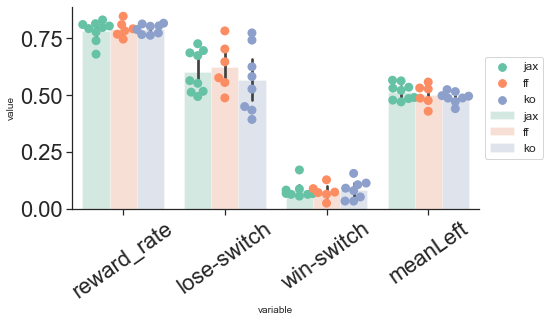

In [63]:
# plot multiple groups per stat
sns.set(style='ticks', font_scale=2, rc={'axes.labelsize':10, 'axes.titlesize':15, 'axes.titleweight':'bold',\
                                         'axes.titlesize':25,'font.weight':'normal'}) 


fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2*4, 5)) #4*int(np.ceil(len(cols)/3)))

test_df = pd.melt(full_stats, id_vars=['treatment'], value_vars=['reward_rate', 'lose-switch', 'win-switch', 'meanLeft'])
sns.barplot(x='variable', y='value', data=test_df, hue='treatment', palette = "Set2", alpha=0.3, hue_order=['jax', 'ff', 'ko'], ax=axs)
sns.swarmplot(x='variable', y='value', data=test_df, palette = "Set2", hue = 'treatment', s = 9, hue_order=['jax', 'ff', 'ko'], dodge=True, ax=axs)
# sns.swarmplot(x='variable', y='value', data=test_df, palette = "Set2", hue = 'treatment', s = 10, dodge=True)


legend = axs.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
axs.set_xticklabels(axs.get_xticklabels(),rotation = 35)

sns.despine()
plt.tight_layout()
plt.savefig('mouse_stats2.svg', dpi=200, bbox_inches="tight")


In [65]:
a = test_df.loc[(test_df['treatment'] == 'ko') & (test_df['variable'] == 'reward_rate')]
b = test_df.loc[(test_df['treatment'] == 'jax') & (test_df['variable'] == 'reward_rate')]
from scipy import stats
s = scipy.stats.ttest_ind(a.loc[:,"value"],b.loc[:,"value"])
print(s.pvalue)
s.pvalue <0.05

NameError: name 'scipy' is not defined

In [ ]:
a = test_df.loc[(test_df['treatment'] == 'ko') & (test_df['variable'] == 'lose-switch')]
b = test_df.loc[(test_df['treatment'] == 'jax') & (test_df['variable'] == 'lose-switch')]
s = scipy.stats.ttest_ind(a.loc[:,"value"],b.loc[:,"value"])
print(s.pvalue)
s.pvalue <0.05

In [ ]:
a = test_df.loc[(test_df['treatment'] == 'ko') & (test_df['variable'] == 'win-switch')]
b = test_df.loc[(test_df['treatment'] == 'jax') & (test_df['variable'] == 'win-switch')]
s = scipy.stats.ttest_ind(a.loc[:,"value"],b.loc[:,"value"])
print(s.pvalue)
s.pvalue <0.05

In [ ]:
a = test_df.loc[(test_df['treatment'] == 'ko') & (test_df['variable'] == 'meanLeft')]
b = test_df.loc[(test_df['treatment'] == 'jax') & (test_df['variable'] == 'meanLeft')]
s = scipy.stats.ttest_ind(a.loc[:,"value"],b.loc[:,"value"])
print(s.pvalue)
s.pvalue <0.05

In [ ]:
# plot multiple groups per stat
sns.set(style='ticks', font_scale=2, rc={'axes.labelsize':10, 'axes.titlesize':15, 'axes.titleweight':'bold',\
                                         'axes.titlesize':25,'font.weight':'normal'}) 


fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2*3, 5)) #4*int(np.ceil(len(cols)/3)))

test_df = pd.melt(full_stats, id_vars=['treatment'], value_vars=['meanITI', 'decisionTime'])
sns.barplot(x='variable', y='value', data=test_df, hue='treatment', palette = "Set2", alpha=0.3, hue_order=['jax', 'ff', 'ko'], ax=axs)
sns.swarmplot(x='variable', y='value', data=test_df, palette = "Set2", hue = 'treatment', s = 9, hue_order=['jax', 'ff', 'ko'], dodge=True, ax=axs)
# sns.swarmplot(x='variable', y='value', data=test_df, palette = palette, hue = 'treatment', s = 9, hue_order=['jax', 'ff', 'ko'], dodge=True, ax=axs)
# sns.swarmplot(x='variable', y='value', data=test_df, palette = "Set2", hue = 'treatment', s = 10, dodge=True)


legend = axs.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
axs.set_xticklabels(axs.get_xticklabels(),rotation = 35)

sns.despine()

plt.tight_layout()
plt.savefig('mouse_stats3.svg', dpi=200, bbox_inches="tight")


In [ ]:
a = test_df.loc[(test_df['treatment'] == 'ko') & (test_df['variable'] == 'meanITI')]
b = test_df.loc[(test_df['treatment'] == 'jax') & (test_df['variable'] == 'meanITI')]
s = scipy.stats.ttest_ind(a.loc[:,"value"],b.loc[:,"value"])
print(s.pvalue)
s.pvalue <0.05

In [ ]:
a = test_df.loc[(test_df['treatment'] == 'ko') & (test_df['variable'] == 'decisionTime')]
b = test_df.loc[(test_df['treatment'] == 'jax') & (test_df['variable'] == 'decisionTime')]
s = scipy.stats.ttest_ind(a.loc[:,"value"],b.loc[:,"value"])
print(s.pvalue)
s.pvalue <0.05

In [ ]:
# plotting mice into groups, defined by treatment column
# ------------

# sns.set(style='ticks', font_scale=2, rc={'axes.labelsize':10, 'axes.titlesize':15, 'axes.titleweight':'bold',\
#                                          'axes.titlesize':25,'font.weight':'normal'}) 

# fig, axs = plt.subplots(nrows=int(np.ceil(len(cols)/3)), ncols=3, figsize=(3*3, 4*int(np.ceil(len(cols)/3))))

# # gradient color coding:
# # palette = sns.light_palette("seagreen", reverse=False,  n_colors=len(mice))

# palette = sns.color_palette("tab20c", len(mice))

# for ax, col in zip(axs.reshape(-1), cols):
   
#     sns.swarmplot(x='treatment', y=col, data=full_stats, palette = palette, hue = mice, s = 15, ax=ax)
#     # x = 'treatment' if we are tagging mice by a different classification in this column
#     # sns.barplot(x='treatment', y=col, data=full_stats, palette = "Set2", alpha=0.3, ax=ax)

#     ax.set(xlabel='', ylabel='', title=col)
#     ax.set_xticklabels(ax.get_xticklabels(),rotation = 35)

#     legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
#     ax.get_legend().remove()

# sns.despine()
# plt.tight_layout()
# # plt.savefig('mouse_stats.svg', dpi=200, bbox_inches="tight")

In [ ]:
# sns.set(style='ticks', font_scale=2, rc={'axes.labelsize':10, 'axes.titlesize':15, 'axes.titleweight':'bold',\
#                                          'axes.titlesize':25,'font.weight':'normal'}) 


# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2*4, 5)) #4*int(np.ceil(len(cols)/3)))

# test_df = pd.melt(full_stats, id_vars=['treatment'], value_vars=['reward_rate', 'lose-switch', 'win-switch', 'meanLeft'])
# # sns.barplot(x='variable', y='value', data=test_df, hue='treatment', palette = "Set2", alpha=0.3,  ax=axs)
# sns.swarmplot(x='variable', y='value', data=test_df, palette = palette, hue = 'treatment', s = 9, dodge=True, ax=axs)

# legend = axs.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
# axs.set_xticklabels(axs.get_xticklabels(),rotation = 35)

# sns.despine()
# plt.tight_layout()
# plt.savefig('mouse_stats2.svg', dpi=200, bbox_inches="tight")

In [ ]:
# sns.set(style='ticks', font_scale=2, rc={'axes.labelsize':10, 'axes.titlesize':15, 'axes.titleweight':'bold',\
#                                          'axes.titlesize':25,'font.weight':'normal'}) 
                                         
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2*4, 5)) #4*int(np.ceil(len(cols)/3)))

# test_df = pd.melt(full_stats, id_vars=['treatment'], value_vars=['reward_rate', 'lose-switch', 'win-switch', 'meanLeft'])
# ax = sns.swarmplot(x='variable', y='value', data=test_df,  color = 'k', s = 9, dodge=True)
# ax = sns.boxplot(x='variable', y='value', data=test_df, color = 'm', saturation = 0.5)

# sns.despine()
# axs.set_xticklabels(axs.get_xticklabels(),rotation = 35)


# plt.tight_layout()
# # plt.savefig('mouse_stats3.svg', dpi=200, bbox_inches="tight")

In [ ]:
# sns.set(style='ticks', font_scale=2, rc={'axes.labelsize':10, 'axes.titlesize':15, 'axes.titleweight':'bold',\
#                                          'axes.titlesize':25,'font.weight':'normal'}) 

# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2*4, 5)) #4*int(np.ceil(len(cols)/3)))

# test_df = pd.melt(full_stats, id_vars=['treatment'], value_vars=['meanITI', 'decisionTime'])
# ax = sns.swarmplot(x='variable', y='value', data=test_df,  color = 'k', s = 9, dodge=True)
# ax = sns.boxplot(x='variable', y='value', data=test_df, color = 'm', saturation = 0.5)
# axs.set_xticklabels(axs.get_xticklabels(),rotation = 35)

# sns.despine()

# plt.tight_layout()
# # plt.savefig('mouse_stats3.svg', dpi=200, bbox_inches="tight")

In [ ]:
# # plotting mice into groups, defined by treatment column
# # ------------

# sns.set(style='ticks', font_scale=2, rc={'axes.labelsize':10, 'axes.titlesize':15, 'axes.titleweight':'bold',\
#                                          'axes.titlesize':25,'font.weight':'normal'}) 

# fig, axs = plt.subplots(nrows=int(np.ceil(len(cols)/3)), ncols=3, figsize=(3*3, 4*int(np.ceil(len(cols)/3))))

# # gradient color coding:
# # palette = sns.light_palette("seagreen", reverse=False,  n_colors=len(mice))

# palette = sns.color_palette("tab20c", len(mice))

# for ax, col in zip(axs.reshape(-1), cols):
   
#     #sns.swarmplot(x='treatment', y=col, data=full_stats, palette = palette, hue = mice, s = 15, ax=ax, order=['control','tetanus'])
#     # x = 'treatment' if we are tagging mice by a different classification in this column
#     sns.barplot(x='cols', y=col, data=full_stats, palette = "Set2", alpha=0.3, ax=ax, order=['control', 'tetanus'])

#     ax.set(xlabel='', ylabel='', title=col)
#     ax.set_xticklabels(ax.get_xticklabels(),rotation = 35)

#     legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
#     ax.get_legend().remove()

# sns.despine()
# plt.tight_layout()
# plt.savefig('chat_lab_stats.svg', dpi=200, bbox_inches="tight")
# sns.set(rc={'savefig.transparent':True})


In [ ]:
# # ttest pvalues for above statistics

# import scipy

# full_stats_tet = full_stats[full_stats['treatment']=='tetanus']
# full_stats_ctr = full_stats[full_stats['treatment']=='mcherry']

# print('ttest_meanITI: {}'.format(scipy.stats.ttest_ind(full_stats_ctr['meanITI'], full_stats_tet['meanITI'], axis=0, , nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)))
# print('ttest_decisionTime: {}'.format(scipy.stats.ttest_ind(full_stats_ctr['decisionTime'], full_stats_tet['decisionTime'], axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)))
# print('ttest_lose-switch: {}'.format(scipy.stats.ttest_ind(full_stats_ctr['lose-switch'], full_stats_tet['lose-switch'], axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)))
# print('ttest_win-switch: {}'.format(scipy.stats.ttest_ind(full_stats_ctr['win-switch'], full_stats_tet['win-switch'], axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)))
# print('ttest_pSwitch: {}'.format(scipy.stats.ttest_ind(full_stats_ctr['pSwitch'], full_stats_tet['pSwitch'], axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)))
# print('ttest_pHighport_sess_avg: {}'.format(scipy.stats.ttest_ind(full_stats_ctr['pHighport_sess_avg'], full_stats_tet['pHighport_sess_avg'], axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)))
# print('ttest_Avg_rewards_sess_avg: {}'.format(scipy.stats.ttest_ind(full_stats_ctr['Avg_rewards_sess_avg'], full_stats_tet['Avg_rewards_sess_avg'], axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)))
# print('ttest_Avg_meanLeft: {}'.format(scipy.stats.ttest_ind(full_stats_ctr['meanLeft'], full_stats_tet['meanLeft'], axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)))
# print('ttest_Avg_meanRight: {}'.format(scipy.stats.ttest_ind(full_stats_ctr['meanRight'], full_stats_tet['meanRight'], axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)))

In [ ]:
# # plotting individual mice
# # ------------

# sns.set(style='ticks', font_scale=1.5, rc={'axes.labelsize':15, 'axes.titlesize':10, 'axes.titleweight':'bold',\
#                                            'axes.titlesize':25,'font.weight':'normal'}) 

# fig, axs = plt.subplots(nrows=int(np.ceil(len(cols)/2)), ncols=2, figsize=(1*15, 6*int(np.ceil(len(cols)/3))))

# for ax, col in zip(axs.reshape(-1), cols):
   
#     sns.swarmplot(x='Mouse', y=col, data=full_stats, palette = "Set2", s = 6, ax=ax)
#     sns.barplot(x='Mouse', y=col, data=full_stats, palette = "Set2", alpha=0.4, ax=ax)

#     ax.set(xlabel='', ylabel='', title=col)
#     ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
#     #ax.xaxis.set_ticklabels(rotation=90)
    
# sns.despine()
# plt.tight_layout()


In [ ]:
## quick view of stats for each session

# data.groupby('Session ID').Reward.mean()